In [1]:
# %pip install --upgrade pip numpy pandas scikit-learn mlxtend pickle5

In [2]:
import pandas as pd
import numpy as np

C:\Users\shaik\AppData\Local\Temp\ipykernel_11408\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("./placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df = df.iloc[:, 1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
# %pip install matplotlib

In [10]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


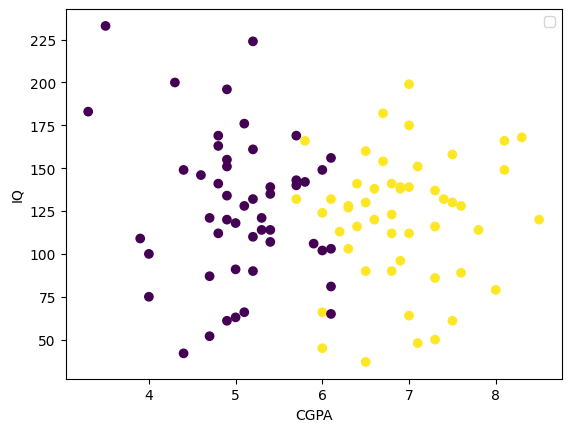

In [11]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend()

In [12]:
X = df.iloc[:, :2]
y = df.iloc[:, 2]

In [13]:
# X
# y

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 2), (10, 2), (90,), (10,))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
# y_train = scaler.transform(y_train)
X_train

array([[-0.2680842 ,  0.20023611],
       [-0.96490955, -1.5195337 ],
       [ 1.38687601,  0.10334767],
       [-0.96490955,  0.24868033],
       [ 1.99659819,  1.07223207],
       [ 1.21266967,  0.20023611],
       [-0.00677469,  0.00645923],
       [-0.96490955, -0.09042921],
       [ 0.69005066,  0.4182351 ],
       [ 0.51584432, -0.09042921],
       [ 0.60294749,  0.73312253],
       [-0.79070321,  0.10334767],
       [-2.35856025,  1.43556372],
       [-0.70360004,  2.42867023],
       [-1.74883807, -1.18042416],
       [-1.13911589, -0.0662071 ],
       [ 0.864257  ,  1.24178684],
       [-0.70360004,  0.20023611],
       [ 0.864257  ,  0.36979088],
       [-0.18098103,  0.44245721],
       [-0.18098103,  1.02378785],
       [ 1.12556651, -0.91398095],
       [-1.74883807, -0.57487141],
       [-1.13911589, -1.73753269],
       [-0.70360004,  0.9026773 ],
       [-0.96490955,  1.75045115],
       [ 0.60294749,  1.41134161],
       [ 0.08032848, -1.0350915 ],
       [-0.87780638,

In [17]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.12556651, -0.18731765],
       [-0.5293937 ,  0.27290244],
       [ 1.82239186,  0.61201198],
       [-0.87780638, -0.7928704 ],
       [ 0.08032848,  0.20023611],
       [-0.09387786, -0.42953875],
       [-0.70360004, -0.81709251],
       [-1.05201272, -0.28420609],
       [-0.96490955,  0.6604562 ],
       [-0.2680842 ,  0.39401299]])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [23]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

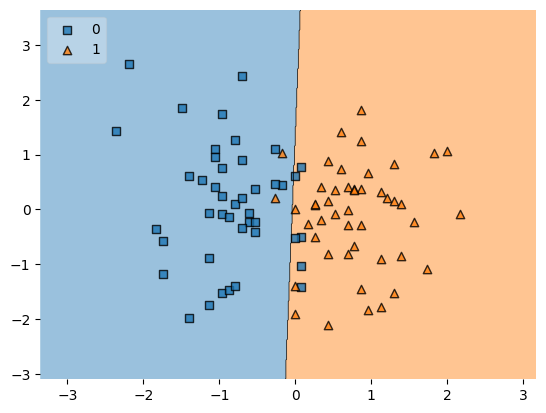

In [24]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend = 2)

In [25]:
import pickle

In [26]:
pickle.dump(clf, open("model.pkl", 'wb'))